In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
#from google.colab import files
#uploaded = files.upload()

In [62]:
df = pd.read_csv("Wine.csv", header = None)
df.columns = [  'name','alcohol','malicAcid','ash','ashalcalinity','magnesium','totalPhenols','flavanoids','nonFlavanoidPhenols','proanthocyanins','colorIntensity','hue','od280_od315','proline']
df.head()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [69]:
X = df.iloc[:,1:15]
y = df.iloc[:,0]
scaler = StandardScaler()
scaled_X = pd.DataFrame(data = scaler.fit_transform(X), columns = df.columns[1:15])


In [70]:
pca = PCA(n_components = 13)
pca_x = pca.fit_transform(scaled_X)
explained_variance = pca.explained_variance_ratio_

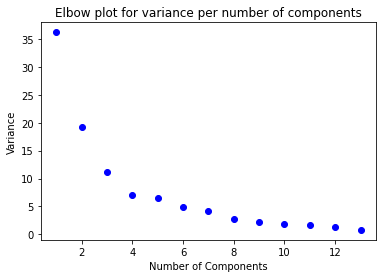

In [71]:
components = [i for i in range(1,14)]
plt.plot(components, explained_variance*100, 'bo')
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Elbow plot for variance per number of components')
plt.show()

In [72]:
pca = PCA(n_components = 4)
pca_X = pca.fit_transform(scaled_X)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.2, random_state = 0)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0